# 4-1-2: Reading images into dataframes

## Download image data and install packages

In [1]:
!rm -rf *.zip osm-cca-* 2>/dev/null
!git clone https://github.com/cca-cce/osm-cca-nlp.git

Cloning into 'osm-cca-nlp'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 89 (delta 24), reused 83 (delta 18), pack-reused 0 (from 0)
Receiving objects: 100% (89/89), 17.05 MiB | 12.33 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [2]:
!pip install -q pymupdf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 18.6 MB/s eta 0:00:00


## Convert PDF to image files

In [3]:
import fitz  # PyMuPDF
import os

# List of directories
directories = [
    '/content/osm-cca-nlp/res/pdf/preem',
    '/content/osm-cca-nlp/res/pdf/vattenfall'
]

for directory in directories:
    if not os.path.exists(directory):
        print(f"Directory does not exist: {directory}")
        continue

    for filename in os.listdir(directory):
        if filename.lower().endswith('.pdf'):
            pdf_path = os.path.join(directory, filename)
            print(f"Processing PDF: {pdf_path}")

            try:
                doc = fitz.open(pdf_path)
                for page_num in range(len(doc)):
                    page = doc[page_num]
                    for img_index, img in enumerate(page.get_images(full=True)):
                        xref = img[0]
                        base_image = doc.extract_image(xref)
                        image_bytes = base_image["image"]
                        image_ext = base_image["ext"]

                        # Save the image
                        output_prefix = os.path.join(directory, os.path.splitext(filename)[0])
                        output_filename = f"{output_prefix}_page{page_num}_img{img_index}.{image_ext}"
                        with open(output_filename, "wb") as f:
                            f.write(image_bytes)
                        print(f"Saved image: {output_filename}")
            except Exception as e:
                print(f"Failed to process {pdf_path}: {e}")


Processing PDF: /content/osm-cca-nlp/res/pdf/preem/hvo-100-and-saf-sustainable-aviation-fuels-icr-project-preem.pdf
Saved image: /content/osm-cca-nlp/res/pdf/preem/hvo-100-and-saf-sustainable-aviation-fuels-icr-project-preem_page1_img0.png
Processing PDF: /content/osm-cca-nlp/res/pdf/preem/raw-materials-sustainability-preem.pdf
Saved image: /content/osm-cca-nlp/res/pdf/preem/raw-materials-sustainability-preem_page0_img0.png
Processing PDF: /content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem.pdf
Saved image: /content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page1_img0.png
Saved image: /content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page5_img0.png
Saved image: /content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page6_img0.png
Saved image: /content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page7_img0.png
Proce

## Read image files to Pandas Dataframe

In [4]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Read the image using OpenCV
image_path = '/content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page5_img0.png'  # Replace with your image path
image = cv2.imread(image_path)

# Display image dimensions
if image is not None:
    height, width, channels = image.shape
    print(f"Image dimensions: {width} x {height} pixels")
    print(f"Number of color channels: {channels}")
else:
    print("Failed to load image. Please check the path.")


Image dimensions: 800 x 533 pixels
Number of color channels: 3


# 4-1-3: Descriptive image analysis

## Read and display images

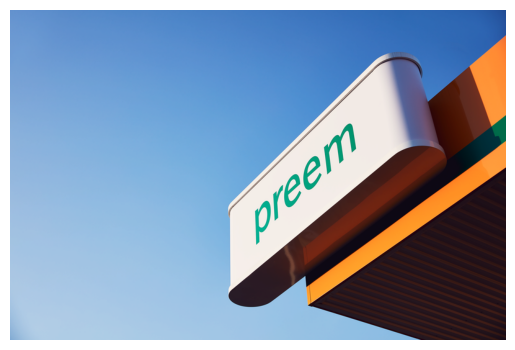

In [5]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Read the image using OpenCV
image_path = '/content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page5_img0.png'  # Replace with your image path
image = cv2.imread(image_path)

# Convert the color scheme from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Use Seaborn to improve plot aesthetics
sns.set()  # Apply Seaborn styles

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()


## Count pixels, width, height, channels

In [6]:
import os
import cv2
import pandas as pd

# Paths to the directories containing images
directories = ['osm-cca-nlp/res/pdf/preem', 'osm-cca-nlp/res/pdf/vattenfall']

# Initialize a list to store image data
image_data = []
image_id = 1  # Initialize image ID counter

# Iterate through each directory
for directory in directories:
    if not os.path.exists(directory):
        print(f"Directory does not exist: {directory}")
        continue

    # Iterate through each file in the directory
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Add other image formats if needed
            # Read the image
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)

            if img is None:  # Skip if the image cannot be loaded
                print(f"Unable to read image: {img_path}")
                continue

            # Extract image dimensions and channels
            height, width, channels = img.shape

            # Append the data to the list
            image_data.append({
                'Image_ID': image_id,
                'Folder_Name': os.path.basename(directory),
                'Filename': filename,
                'Width': width,
                'Height': height,
                'Channels': channels
            })

            image_id += 1  # Increment the image ID

# Create a DataFrame from the image data
image_df = pd.DataFrame(image_data)

# Display the DataFrame
image_df.head()


,Image_ID,Folder_Name,Filename,Width,Height,Channels
0,1,preem,production-of-renewable-diesel-synsat-project-...,1050,789,3
1,2,preem,production-of-renewable-diesel-synsat-project-...,800,533,3
2,3,preem,production-of-renewable-diesel-synsat-project-...,816,661,3
3,4,preem,raw-materials-sustainability-preem_page0_img0.png,800,318,3
4,5,preem,production-of-renewable-diesel-synsat-project-...,1050,789,3


## Extract image features, color info

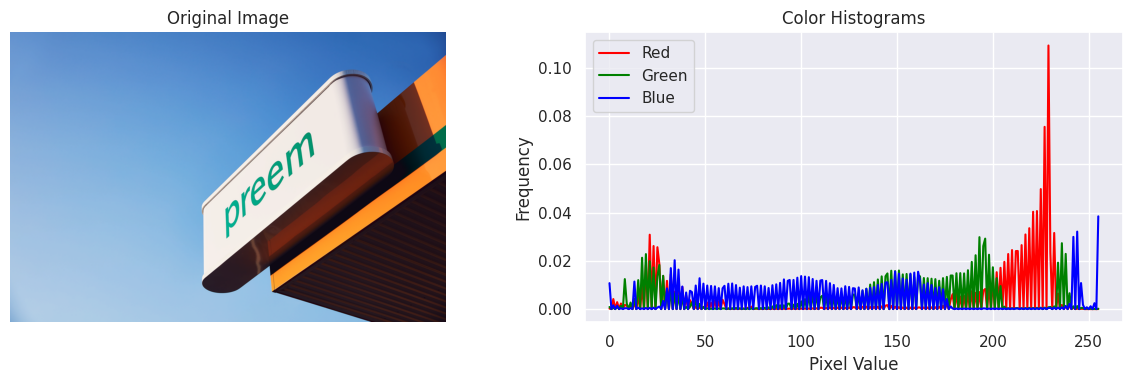

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the image
image = cv2.imread('/content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page5_img0.png')

# Calculate color histograms for each channel
hist_r = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
hist_b = cv2.calcHist([image], [2], None, [256], [0, 256])

# Normalize histograms
hist_r /= hist_r.sum()
hist_g /= hist_g.sum()
hist_b /= hist_b.sum()

# Create subplots for the original image and histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the original image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# Plot the color histograms using Seaborn
sns.lineplot(x=np.arange(256), y=hist_r.squeeze(), color='red', ax=axes[1], label='Red')
sns.lineplot(x=np.arange(256), y=hist_g.squeeze(), color='green', ax=axes[1], label='Green')
sns.lineplot(x=np.arange(256), y=hist_b.squeeze(), color='blue', ax=axes[1], label='Blue')
axes[1].set_title('Color Histograms')
axes[1].set_xlabel('Pixel Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


## Extract image features, edge info

Edge Detection Algorithm: Canny


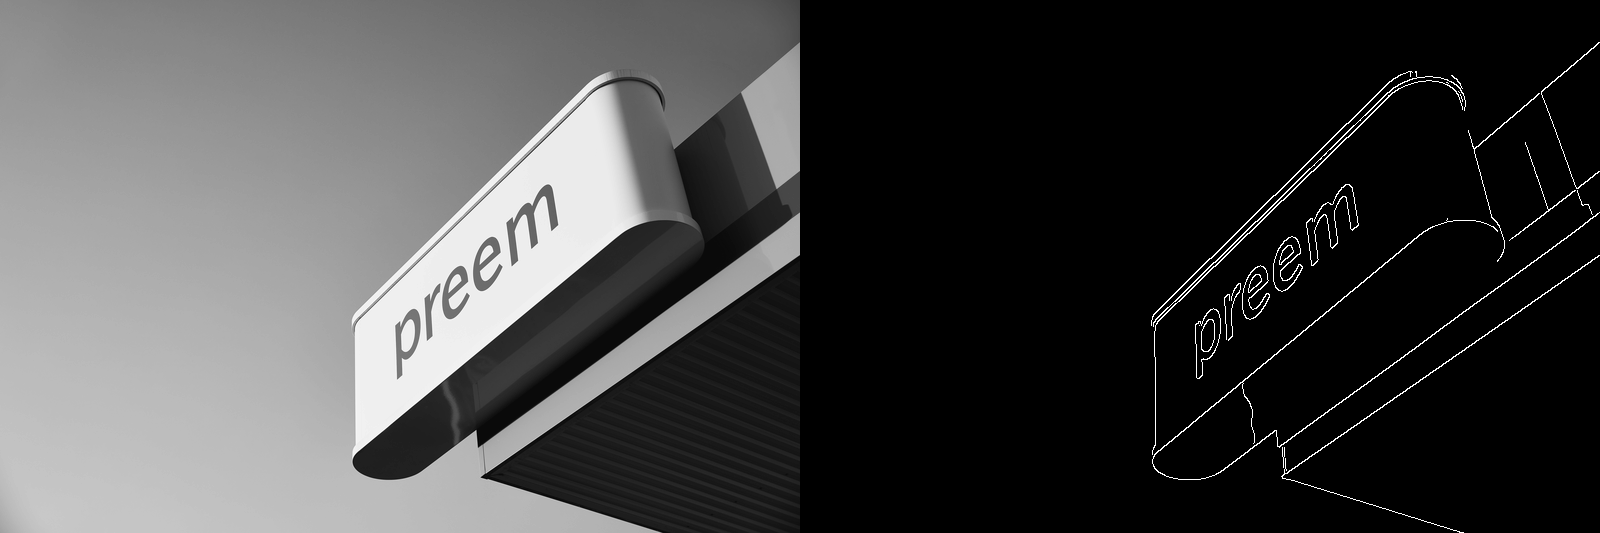

Number of white edge pixels: 6081

Saved as edges_Canny.jpg

Edge Detection Algorithm: Sobel_X


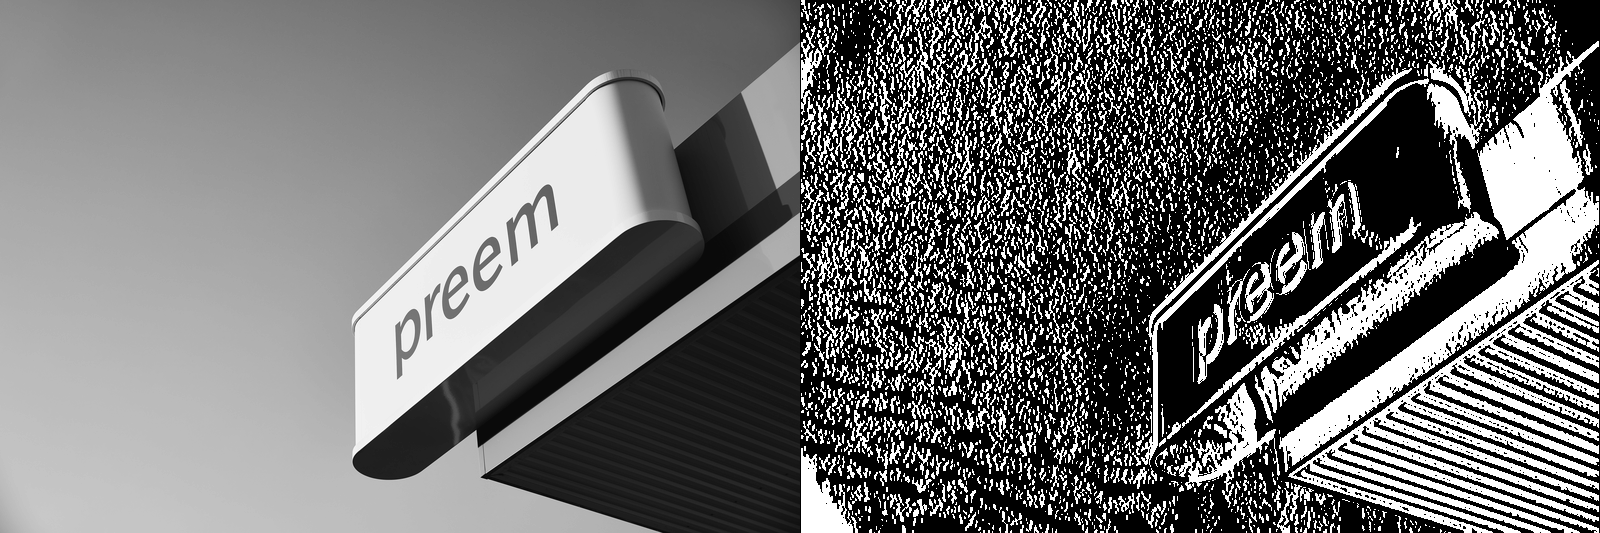

Number of white edge pixels: 149451

Saved as edges_Sobel_X.jpg

Edge Detection Algorithm: Sobel_Y


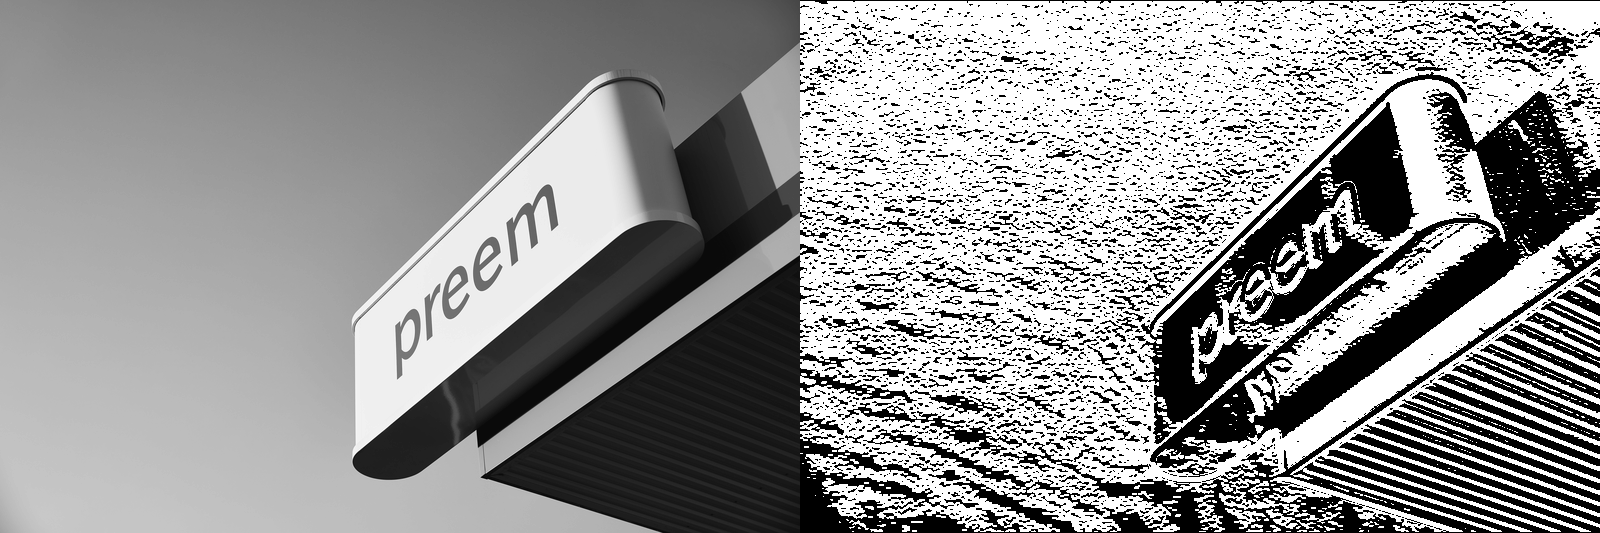

Number of white edge pixels: 271256

Saved as edges_Sobel_Y.jpg



In [8]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read the image
image = cv2.imread('/content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page5_img0.png', cv2.IMREAD_GRAYSCALE)

# Define edge detection settings
edge_detection_settings = [
    ('Canny', cv2.Canny(image, 50, 150)),
#    ('Laplacian', cv2.Laplacian(image, cv2.CV_64F)),
    ('Sobel_X', cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)),
    ('Sobel_Y', cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5))
]

# Iterate through edge detection settings
for setting_name, edges in edge_detection_settings:
    # Convert the edges to binary (keeping them in 0-255 range)
    edges_binary = np.where(edges > 0, 255, 0).astype(np.uint8)

    # Count the number of white edge pixels
    white_pixel_count = cv2.countNonZero(edges_binary)

    # Concatenate the original image and binary edge image horizontally
    concatenated_image = np.hstack((image, edges_binary))

    # Display the concatenated image using cv2_imshow
    print(f'Edge Detection Algorithm: {setting_name}')
    cv2_imshow(concatenated_image)
    print(f'Number of white edge pixels: {white_pixel_count}\n')

    # Save the concatenated image with the specified filename prefix
    filename = f'edges_{setting_name}.jpg'
    cv2.imwrite(filename, concatenated_image)

    print(f'Saved as {filename}\n')


# 4-2-2: Inferential image analysis, classification

## Select and display test image

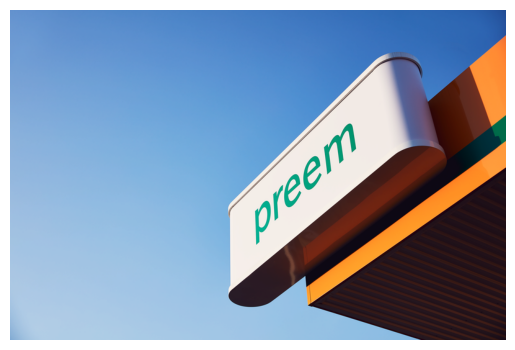

In [10]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Read the image using OpenCV
#image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0009.png"
image_path = '/content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page5_img0.png'  # Replace with your image path
image = cv2.imread(image_path)

# Convert the color scheme from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Use Seaborn to improve plot aesthetics
sns.set()  # Apply Seaborn styles

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()


## Install image classification model

In [12]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import torch

# Path to the input image
image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0009.png"
image_path = '/content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page5_img0.png'  # Replace with your image path

# Load the image
image = Image.open(image_path).convert("RGB")

# Load the pre-trained ViT model and feature extractor
model_name = "google/vit-base-patch16-224"
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)

# Preprocess the image
inputs = feature_extractor(images=image, return_tensors="pt")

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Get predicted class probabilities
probs = torch.nn.functional.softmax(outputs.logits[0], dim=-1)

# Get the top 10 classes by confidence score
top_k = 10
top_probs, top_classes = torch.topk(probs, top_k)

# Load class labels
labels = model.config.id2label

# Print the top 10 classes with confidence scores
print("Top 10 Predicted Classes:")
for i in range(top_k):
    print(f"{i + 1}: {labels[top_classes[i].item()]} ({top_probs[i].item() * 100:.2f}%)")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Top 10 Predicted Classes:
1: street sign (76.68%)
2: traffic light, traffic signal, stoplight (6.39%)
3: cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM (2.57%)
4: tobacco shop, tobacconist shop, tobacconist (1.65%)
5: mailbox, letter box (1.06%)
6: digital clock (0.64%)
7: pay-phone, pay-station (0.59%)
8: vending machine (0.40%)
9: gas pump, gasoline pump, petrol pump, island dispenser (0.39%)
10: scoreboard (0.39%)


## Iterate classification to dataframe

In [20]:
import os
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import torch
import pandas as pd
import numpy as np

# Directories to process
directories = {
    "cv-org1-preem": "/content/osm-cca-nlp/res/pdf/preem/",
    "cv-org2-vattenfall": "/content/osm-cca-nlp/res/pdf/vattenfall/"
}

# Load model and processor
model_name = "google/vit-base-patch16-224"
processor = ViTImageProcessor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)

results = []

for org_name, dir_path in directories.items():
    for file_name in os.listdir(dir_path):
        if file_name.endswith(".png"):
            image_path = os.path.join(dir_path, file_name)

            try:
                # Load and convert image to RGB
                image = Image.open(image_path).convert("RGB")

                # Skip if image is too small
                if image.width < 100 or image.height < 100:
                    print(f"Skipping small image: {image_path} ({image.width}x{image.height})")
                    continue

                # Convert to NumPy array
                image_np = np.array(image)
                if image_np.ndim != 3 or image_np.shape[2] != 3:
                    print(f"Skipping malformed image: {image_path} with shape {image_np.shape}")
                    continue

                # Preprocess
                inputs = processor(
                    images=image_np,
                    return_tensors="pt",
                    input_data_format="channels_last"
                )

                # Inference
                with torch.no_grad():
                    outputs = model(**inputs)
                probs = torch.nn.functional.softmax(outputs.logits[0], dim=-1)
                top_probs, top_classes = torch.topk(probs, 10)

                for i in range(10):
                    results.append({
                        "organization": org_name,
                        "image_path": image_path,
                        "label_rank": i + 1,
                        "class_label": model.config.id2label[top_classes[i].item()],
                        "confidence_score": top_probs[i].item()
                    })

            except Exception as e:
                print(f"Error processing {image_path}: {e}")

# Export
df = pd.DataFrame(results)
df.to_csv("/content/image_classification_results.tsv", sep="\t", index=False)

# Display
df.head()


Skipping small image: /content/osm-cca-nlp/res/pdf/vattenfall/shifting-the-climate-narrative-vattenfall_page9_img0.png (1x1)
Skipping small image: /content/osm-cca-nlp/res/pdf/vattenfall/fossil-free-fertilisers-a-key-to-cutting-carbon-emissions-vattenfall_page6_img0.png (1x1)
Skipping small image: /content/osm-cca-nlp/res/pdf/vattenfall/fossil-free-fertilisers-a-key-to-cutting-carbon-emissions-vattenfall_page5_img0.png (1x1)
Skipping small image: /content/osm-cca-nlp/res/pdf/vattenfall/vattenfall-expands-circular-targes-on-wind-turbine-components-vattenfall_page3_img0.png (1x1)
Skipping small image: /content/osm-cca-nlp/res/pdf/vattenfall/vattenfall-expands-circular-targes-on-wind-turbine-components-vattenfall_page4_img1.png (1x1)
Skipping small image: /content/osm-cca-nlp/res/pdf/vattenfall/shifting-the-climate-narrative-vattenfall_page8_img0.png (1x1)
Skipping small image: /content/osm-cca-nlp/res/pdf/vattenfall/fossil-free-fertilisers-a-key-to-cutting-carbon-emissions-vattenfall_pag

# 4-2-3: Inferential image analysis, object detection

## Hugging Face computer vision models

In [ ]:
from transformers import DetrImageProcessor, DetrForObjectDetection
from PIL import Image, ImageDraw, ImageFont
import torch
import matplotlib.pyplot as plt


## Sample object detection image

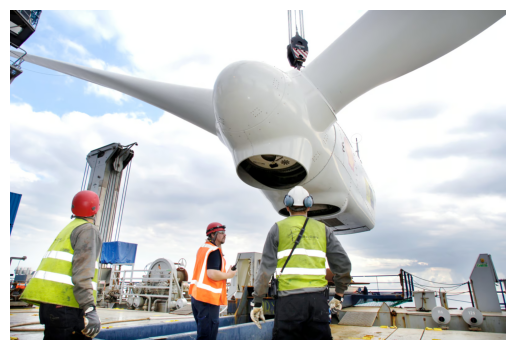

In [24]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Read the image using OpenCV
#image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0009.png"
image_path = '/content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page5_img0.png'  # Replace with your image path
image_path = '/content/osm-cca-nlp/res/pdf/vattenfall/vattenfall-expands-circular-targes-on-wind-turbine-components-vattenfall_page0_img0.png'
image = cv2.imread(image_path)

# Convert the color scheme from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Use Seaborn to improve plot aesthetics
sns.set()  # Apply Seaborn styles

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()


## Test object detection vision model

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


TrueType font not found. Using default font.
Detected: cell phone | Confidence: 0.92 | Location: [x_min: 716, y_min: 816, x_max: 740, y_max: 842]
Detected: person | Confidence: 1.0 | Location: [x_min: 579, y_min: 687, x_max: 742, y_max: 1061]
Detected: handbag | Confidence: 0.96 | Location: [x_min: 836, y_min: 665, x_max: 976, y_max: 940]
Detected: person | Confidence: 1.0 | Location: [x_min: 98, y_min: 587, x_max: 301, y_max: 1057]
Detected: person | Confidence: 1.0 | Location: [x_min: 782, y_min: 571, x_max: 1108, y_max: 1056]


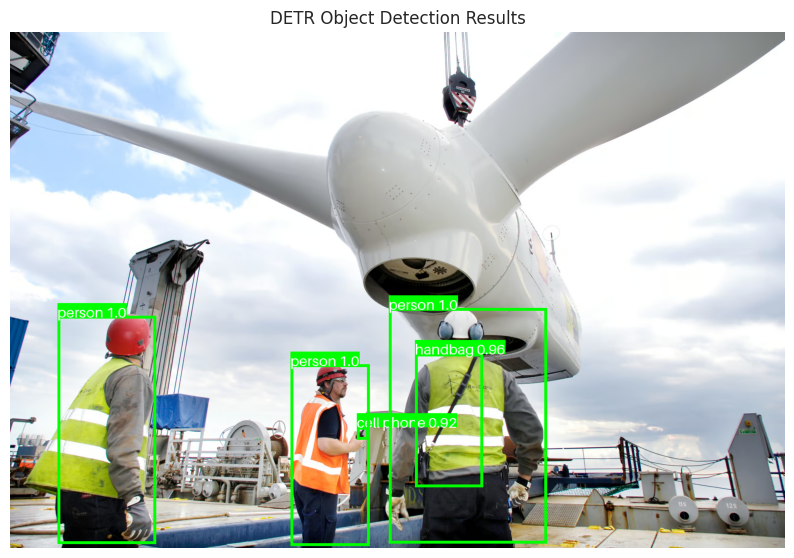

Object detection completed. Result saved to /content/detr_object_detection_result.png


In [23]:
from transformers import DetrImageProcessor, DetrForObjectDetection
from PIL import Image, ImageDraw, ImageFont
import torch
import matplotlib.pyplot as plt

# Path to the input image
image_path = "/content/cv-org2-vattenfall/frame_YIqk0ylo4rI_0009.png"
image_path = '/content/osm-cca-nlp/res/pdf/preem/production-of-renewable-diesel-synsat-project-preem_page5_img0.png'  # Replace with your image path
image_path = '/content/osm-cca-nlp/res/pdf/vattenfall/vattenfall-expands-circular-targes-on-wind-turbine-components-vattenfall_page0_img0.png'
output_image_path = "/content/detr_object_detection_result.png"

# Load the image
image = Image.open(image_path).convert("RGB")

# Load the DETR model and processor
model_name = "facebook/detr-resnet-50"
processor = DetrImageProcessor.from_pretrained(model_name)
model = DetrForObjectDetection.from_pretrained(model_name)

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Post-process the results
target_sizes = torch.tensor([image.size[::-1]])  # (height, width)
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# Prepare to draw on the image
draw = ImageDraw.Draw(image)

# Load a TrueType font or fallback to default
try:
    font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"  # Update path if needed
    font = ImageFont.truetype(font_path, size=30)  # Increased font size to 30
except OSError:
    print("TrueType font not found. Using default font.")
    font = ImageFont.load_default(size=30)

# Draw bounding boxes and annotations
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    # Extract bounding box coordinates and label
    x_min, y_min, x_max, y_max = [round(i) for i in box.tolist()]
    label_text = f"{model.config.id2label[label.item()]} {round(score.item(), 2)}"

    # Print detected object details
    print(f"Detected: {model.config.id2label[label.item()]} | "
          f"Confidence: {round(score.item(), 2)} | "
          f"Location: [x_min: {x_min}, y_min: {y_min}, x_max: {x_max}, y_max: {y_max}]")

    # Draw the bounding box in green (R:0, G:255, B:0) with increased line width
    draw.rectangle([x_min, y_min, x_max, y_max], outline=(0, 255, 0), width=6)

    # Annotate with class label and confidence score
    text_bbox = draw.textbbox((x_min, y_min), label_text, font=font)  # Get the bounding box of the text
    text_width, text_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]
    draw.rectangle([x_min, y_min - text_height, x_min + text_width, y_min], fill=(0, 255, 0))
    draw.text((x_min, y_min - text_height), label_text, fill="white", font=font)

# Save the result image
image.save(output_image_path)

# Display the result image using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.title("DETR Object Detection Results")
plt.show()

print(f"Object detection completed. Result saved to {output_image_path}")


# 4-3-2: Summarizing results of image analysis

## Read image classification data

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the previously saved TSV file
input_tsv_path = "/content/image_classification_results.tsv"
df = pd.read_csv(input_tsv_path, sep="\t")

# Display
df.head()

,organization,image_path,label_rank,class_label,confidence_score
0,cv-org1-preem,/content/osm-cca-nlp/res/pdf/preem/production-...,1,alp,0.223112
1,cv-org1-preem,/content/osm-cca-nlp/res/pdf/preem/production-...,2,"valley, vale",0.204691
2,cv-org1-preem,/content/osm-cca-nlp/res/pdf/preem/production-...,3,ski,0.106525
3,cv-org1-preem,/content/osm-cca-nlp/res/pdf/preem/production-...,4,snowmobile,0.070950
4,cv-org1-preem,/content/osm-cca-nlp/res/pdf/preem/production-...,5,volcano,0.030794


## Split class labels to words

In [28]:
# Split the `class_label` column into individual words
expanded_rows = []
for _, row in df.iterrows():
    words = row['class_label'].replace(',', '').split()
    for word in words:
        expanded_rows.append({'organization': row['organization'], 'class_label_word': word})

# Create a new DataFrame with one label word per row
expanded_df = pd.DataFrame(expanded_rows)

# Display
expanded_df.head()

,organization,class_label_word
0,cv-org1-preem,alp
1,cv-org1-preem,valley
2,cv-org1-preem,vale
3,cv-org1-preem,ski
4,cv-org1-preem,snowmobile


## Select, filter, aggregate results

In [29]:
# Aggregate by organization and class_label_word
aggregated_df = expanded_df.groupby(['organization', 'class_label_word']).size().reset_index(name='count')

# Filter for the top 10 labels by organization
top_labels = aggregated_df.groupby('organization').apply(
    lambda x: x.nlargest(10, 'count')
).reset_index(drop=True)

# Display
top_labels.head()

<ipython-input-29-70058480>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_labels = aggregated_df.groupby('organization').apply(


,organization,class_label_word,count
0,cv-org1-preem,machine,5
1,cv-org1-preem,beacon,4
2,cv-org1-preem,fence,4
3,cv-org1-preem,teller,4
4,cv-org1-preem,light,3


# 4-3-3: Visualizing results of image analysis

## Grouped bar plot

<ipython-input-21-2053119237>:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_labels = aggregated_df.groupby('organization').apply(


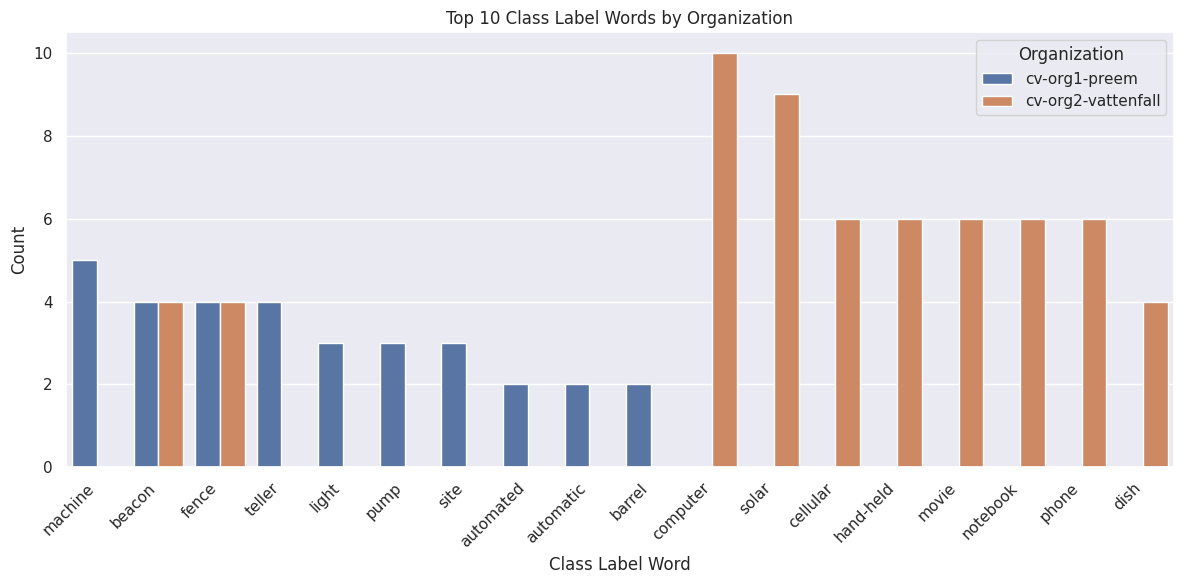

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the previously saved TSV file
input_tsv_path = "/content/image_classification_results.tsv"
df = pd.read_csv(input_tsv_path, sep="\t")

# Split the `class_label` column into individual words
expanded_rows = []
for _, row in df.iterrows():
    words = row['class_label'].replace(',', '').split()
    for word in words:
        expanded_rows.append({'organization': row['organization'], 'class_label_word': word})

# Create a new DataFrame with one label word per row
expanded_df = pd.DataFrame(expanded_rows)

# Aggregate by organization and class_label_word
aggregated_df = expanded_df.groupby(['organization', 'class_label_word']).size().reset_index(name='count')

# Filter for the top 10 labels by organization
top_labels = aggregated_df.groupby('organization').apply(
    lambda x: x.nlargest(10, 'count')
).reset_index(drop=True)

# Visualize the results using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_labels,
    x='class_label_word',
    y='count',
    hue='organization'
)
plt.title('Top 10 Class Label Words by Organization')
plt.xlabel('Class Label Word')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Organization')
plt.tight_layout()
plt.show()
